Chapter 12
# 平面仿射变换
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

### 产生网格数据

In [3]:
x1 = np.arange(-20, 20 + 1, step=1)
x2 = np.arange(-20, 20 + 1, step=1)

XX1,XX2 = np.meshgrid(x1,x2)
X = np.column_stack((XX1.ravel(),XX2.ravel()))

### 自定义可视化函数

In [4]:
def visualize_transform(XX1, XX2, ZZ1, ZZ2, cube, arrows, fig_name):
    
    colors = np.arange(len(XX1.ravel()))

    fig, ax = plt.subplots(figsize = (5,5))

    # 绘制原始网格
    plt.plot(XX1,XX2,color = [0.8,0.8,0.8], lw = 0.25)
    plt.plot(XX1.T,XX2.T,color = [0.8,0.8,0.8], lw = 0.25)
    # plt.scatter(XX1.ravel(), XX2.ravel(), c = colors, s = 10, cmap = 'plasma', zorder=1e3)
    
    #绘制几何变换后的网格
    plt.plot(ZZ1,ZZ2,color = '#0070C0', lw = 0.25)
    plt.plot(ZZ1.T,ZZ2.T,color = '#0070C0', lw = 0.25)
    
    ax.fill(cube[:,0], cube[:,1], color = '#92D050', alpha = 0.5) 
    ax.quiver(0,0,arrows[0,0], arrows[0,1], color = 'r', angles='xy', scale_units='xy', scale=1)
    ax.quiver(0,0,arrows[1,0], arrows[1,1], color = 'g', angles='xy', scale_units='xy', scale=1)

    plt.axis('scaled')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    plt.xticks([])
    plt.yticks([])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    fig.savefig('Figures/' + fig_name + '.svg', format='svg')


### 原始网格

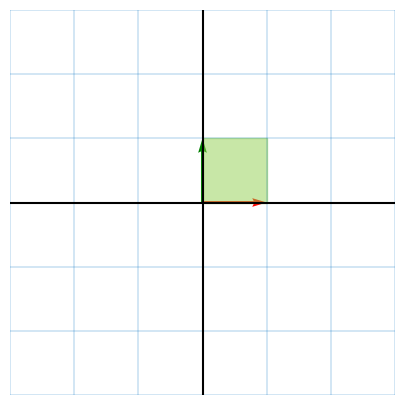

In [5]:
colors = np.arange(len(XX1.ravel()))

fig, ax = plt.subplots(figsize = (5,5))

cube = np.array([[0, 0], 
                 [1, 0], 
                 [1, 1],
                 [0, 1]])
arrows = np.array([[1, 0],
                   [0, 1]])


# 绘制原始网格
plt.plot(XX1,XX2,color = '#0070C0', lw = 0.25)
plt.plot(XX1.T,XX2.T,color = '#0070C0', lw = 0.25)
ax.fill(cube[:,0], cube[:,1], color = '#92D050', alpha = 0.5) 
ax.quiver(0,0,arrows[0,0], arrows[0,1], color = 'r', angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0,arrows[1,0], arrows[1,1], color = 'g', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/原始网格.svg', format='svg')

### 旋转

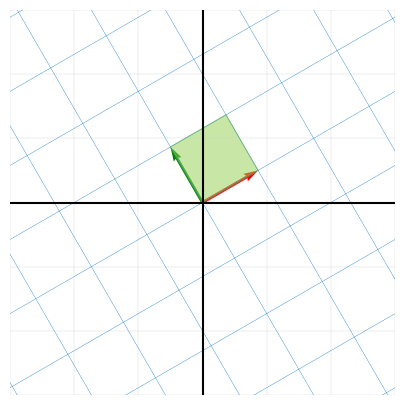

In [6]:
# 绕原点，逆时针旋转30

theta = 30/180*np.pi
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

Z = X@R.T;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))
fig_name = '逆时针旋转30度'

cube_ = cube @ R.T;
arrows_ = arrows @ R.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

### 等比例放大

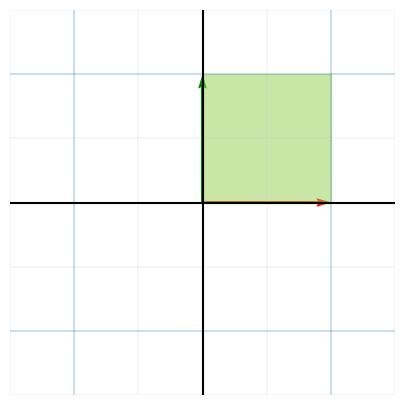

In [7]:
S = np.array([[2, 0],
              [0, 2]])

Z = X@S;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig_name = '等比例放大'
cube_ = cube @ S.T;
arrows_ = arrows @ S.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

### 等比例缩小

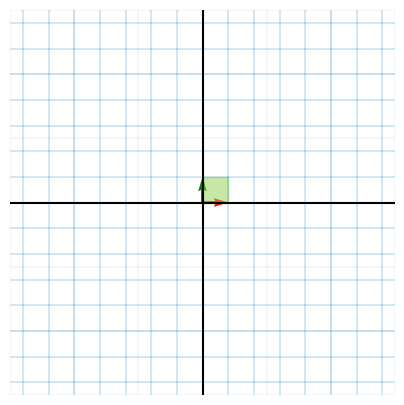

In [8]:
S = np.array([[0.4, 0],
              [0,   0.4]])

Z = X@S;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig_name = '等比例缩小'
cube_ = cube @ S.T;
arrows_ = arrows @ S.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

### 非等比例缩放

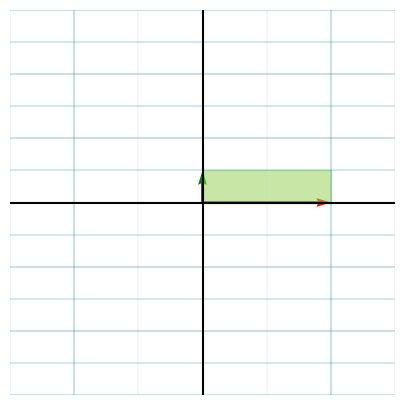

In [9]:
S = np.array([[2, 0],
              [0, 0.5]])

Z = X@S;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig_name = '非等比例缩放'
cube_ = cube @ S.T;
arrows_ = arrows @ S.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

### 先缩放，再旋转

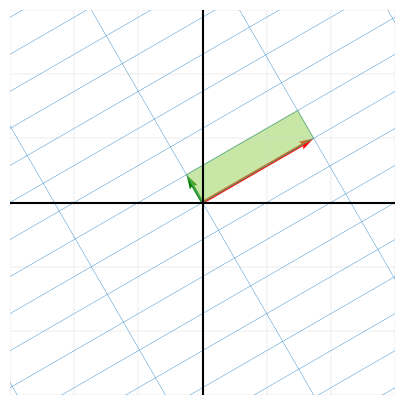

In [10]:
Z = X@S.T@R.T;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig_name = '先缩放，再旋转'
cube_ = cube @S.T@R.T;
arrows_ = arrows @S.T@R.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

### 先旋转，再放大

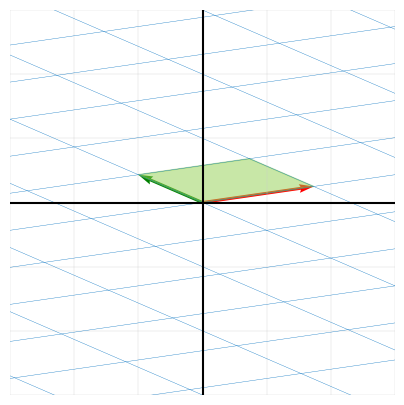

In [11]:
Z = X@R.T@S.T;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig_name = '先旋转，再缩放'
cube_ = cube @R.T@S.T;
arrows_ = arrows @R.T@S.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

### 沿横轴剪切

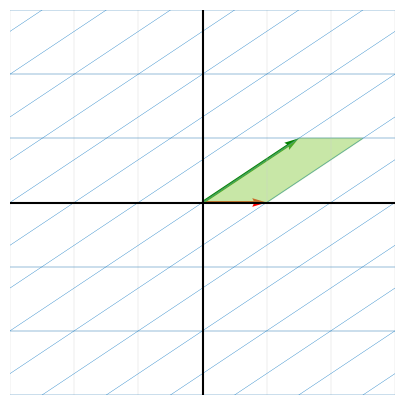

In [12]:
T = np.array([[1, 1.5],
              [0, 1]])

Z = X@T.T;

ZZ1 = Z[:,0].reshape((len(x1), len(x2)))
ZZ2 = Z[:,1].reshape((len(x1), len(x2)))

fig_name = '沿横轴剪切'
cube_ = cube @T.T;
arrows_ = arrows @T.T;

visualize_transform(XX1, XX2, ZZ1, ZZ2, cube_, arrows_, fig_name)

In [13]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023